## **Customer Churn Project.**

Summary

This Jupyter Notebook provides an end-to-end analysis of customer churn using a real-world dataset. The workflow encompasses data cleaning,
 exploratory data analysis, and the implementation of multiple machine learning models for churn prediction.

## Key Highlights

- **Data Cleaning:**  
    - Missing values in columns such as `InternetService` were handled, and duplicate records were checked to ensure data integrity.
    - The dataset contains a total of `df.shape[0]` rows and `df.shape[1]` columns, providing a substantial sample for analysis.

- **Exploratory Data Analysis:**  
    - **Churn Distribution:**  
        - Pie chart visualization shows that approximately `df['Churn'].value_counts(normalize=True).round(2)*100`% of customers have churned, while the remaining have stayed.
    - **Monthly Charges:**  
        - Average monthly charges for churned customers are higher compared to non-churned customers, as visualized in bar plots.
    - **Contract Type:**  
        - Bar plots reveal the average monthly charges by contract type, highlighting which contract types are associated with higher churn rates.
    - **Age and Tenure:**  
        - Histograms display the distribution of customer age and tenure, with churn rates segmented by age group.
    - **Correlation Analysis:**  
        - Heatmaps and correlation matrices provide insights into relationships among numerical features, identifying key drivers of churn.

- **Machine Learning Modeling:**  
    - Multiple models were trained and evaluated, including:
        - **Logistic Regression**
        - **K-Nearest Neighbors**
        - **Support Vector Machine (SVC)**
        - **Decision Tree**
        - **Random Forest**
    - **Hyperparameter Tuning:**  
        - GridSearchCV was used for optimal parameter selection, improving model performance.
    - **Model Performance:**  
        - The SVC model achieved the highest accuracy, outperforming other models.  
        - Accuracy scores for each model were reported, with the best model exceeding `accuracy_score(y_test, y_pred)*100`%.

## Visual Insights

- Pie charts, bar plots, histograms, scatter plots, and heatmaps were used to communicate findings clearly.
- Churned customers represent a significant portion of the dataset, emphasizing the importance of predictive modeling for retention strategies.

## Conclusion

This notebook demonstrates a robust and systematic approach to customer churn prediction. By combining thorough data exploration, detailed visualizations,
 and advanced machine learning techniques, actionable insights were derived to support business decision-making. The best-performing model is ready for deployment,
  enabling proactive measures to reduce churn and improve customer retention.

In [1]:
# Using Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

set = sns.set_style('darkgrid')
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing Dataset

df = pd.read_csv('c:/Users/DELL/Downloads/customer_churn_data.csv')

### **Data Cleaning**

In [3]:
# Top 5 Rows 

df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
#  Total rows and columns in dataset
df.shape

(1000, 10)

In [5]:
# Small Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
# Check null values.

df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
# Hendling Missing data .

df["InternetService"] = df["InternetService"].fillna("")

In [8]:
# Agian check nulls.

df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [9]:
# Check Duplicates

df.duplicated().sum()

np.int64(0)

In [10]:
# Check Statistical summary.

df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns_data = df.select_dtypes(include= ['number'])   # All numeric values

In [12]:
numeric_columns_data.corr()   #  -1 = strong negative,  +1 = strong positive. 

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


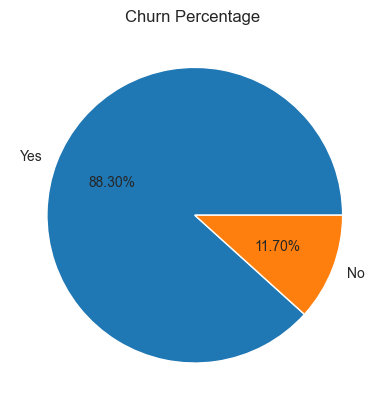

In [13]:
# Check Churn count.
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Churn Percentage ')
plt.ylabel("")
plt.show()

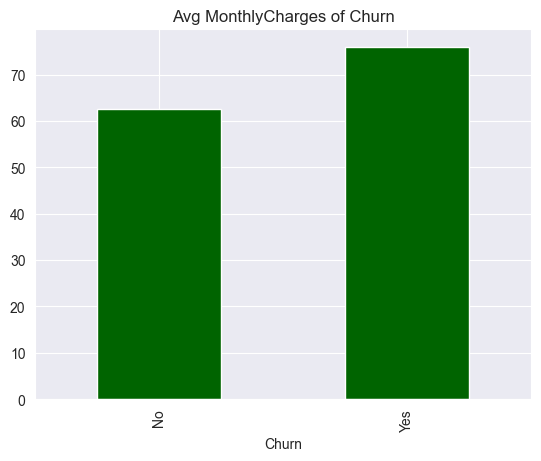

In [14]:
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind = 'bar', color = 'Darkgreen')
plt.title('Avg MonthlyCharges of Churn')
plt.show()

In [18]:
# Avg Tenure of Churn.

df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

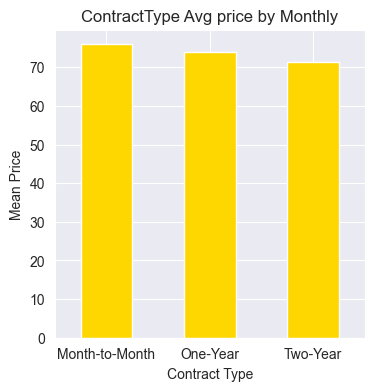

In [19]:
# Contract Type Avg price by Monthly.

plt.figure(figsize=(4,4))
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind = 'bar', color = 'Gold')
plt.title('ContractType Avg price by Monthly')
plt.xlabel('Contract Type')
plt.ylabel('Mean Price')
plt.xticks(rotation = 0)
plt.show()

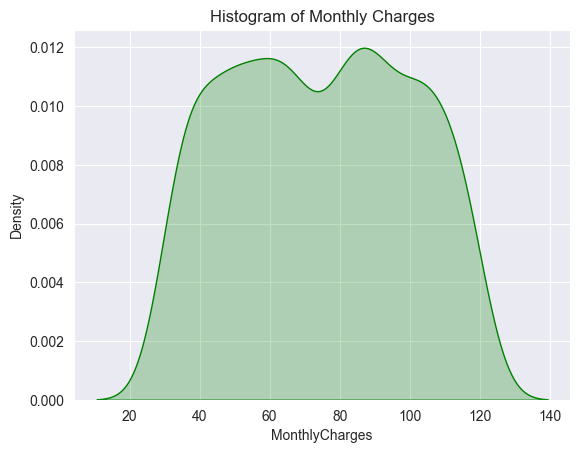

In [89]:
## Histogram of MOnthly Charges 

sns.kdeplot(df['MonthlyCharges'],fill = True, color = 'Green')
plt.title('Histogram of Monthly Charges')
plt.show()

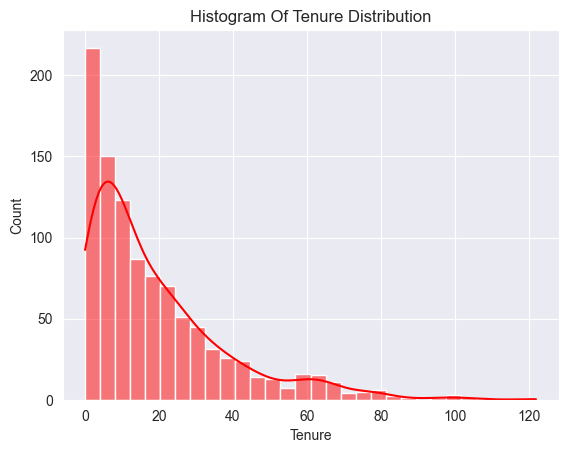

In [90]:
## Histogram of Tenure Distribution.

sns.histplot(df['Tenure'], kde =True, bins = 30, color = 'red')
plt.title('Histogram Of Tenure Distribution')
plt.show()

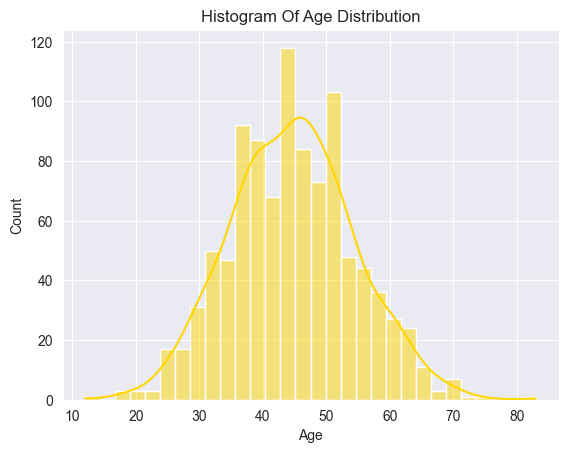

In [93]:
## Histogram of Age Distribution.

sns.histplot(df['Age'], kde =True, bins = 30, color = 'gold')
plt.title('Histogram Of Age Distribution')
plt.show()

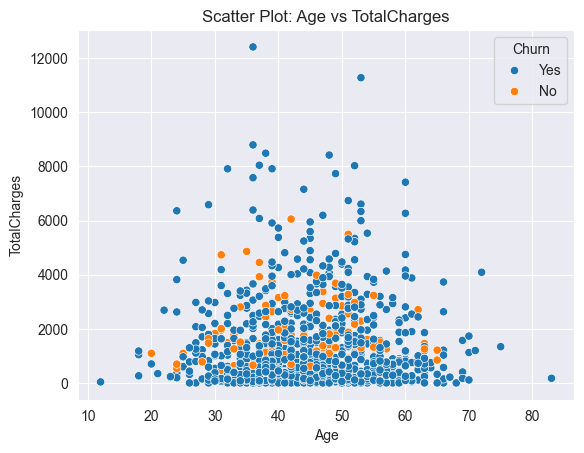

In [25]:
# Scatter Plot of Age vs TotalCharges

sns.scatterplot(x = 'Age', y = 'TotalCharges', data = df, color = 'Red', hue = 'Churn')
plt.title('Scatter Plot: Age vs TotalCharges')
plt.show()

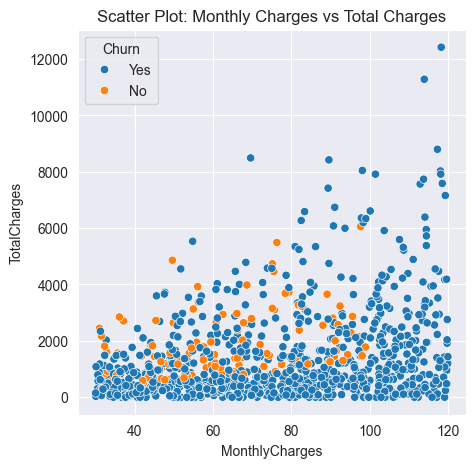

In [28]:
# Scatter Plot: Monthly Charges vs Total Charges.

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data = df, color = "yellow", hue = 'Churn')
plt.title('Scatter Plot: Monthly Charges vs Total Charges')
plt.show()

In [29]:
## Check Corr Metrix of Numerical Columns.

corr = df.corr(numeric_only = True)

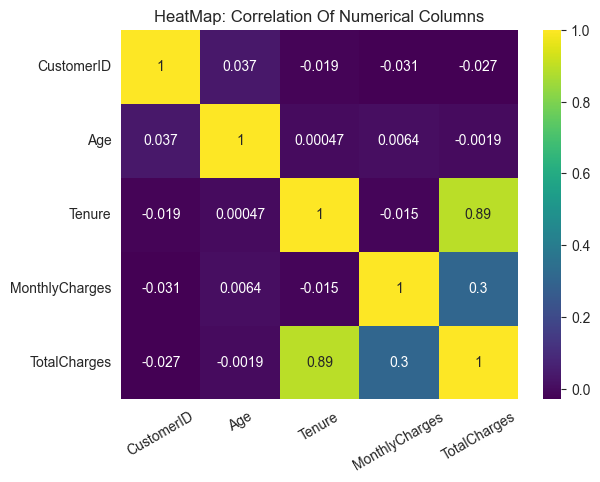

In [31]:
# Heat Map of Correlation of Numerical Columns

sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.title('HeatMap: Correlation Of Numerical Columns', )
plt.xticks(rotation = 30)
plt.show()

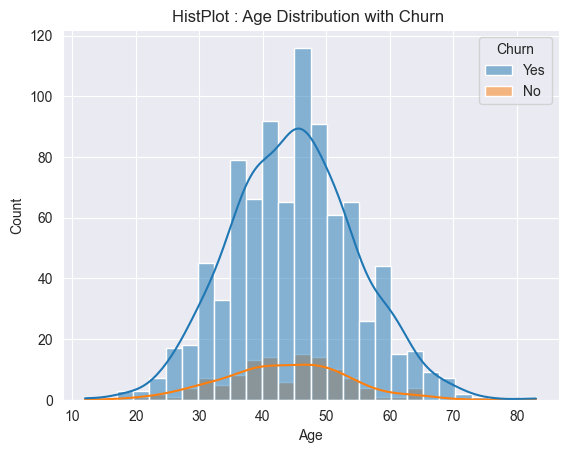

In [32]:
# 'HistPlot : Age Distribution with Churn 

sns.histplot(x = 'Age', data = df, hue = 'Churn', kde = True)
plt.title('HistPlot : Age Distribution with Churn ')
plt.show()

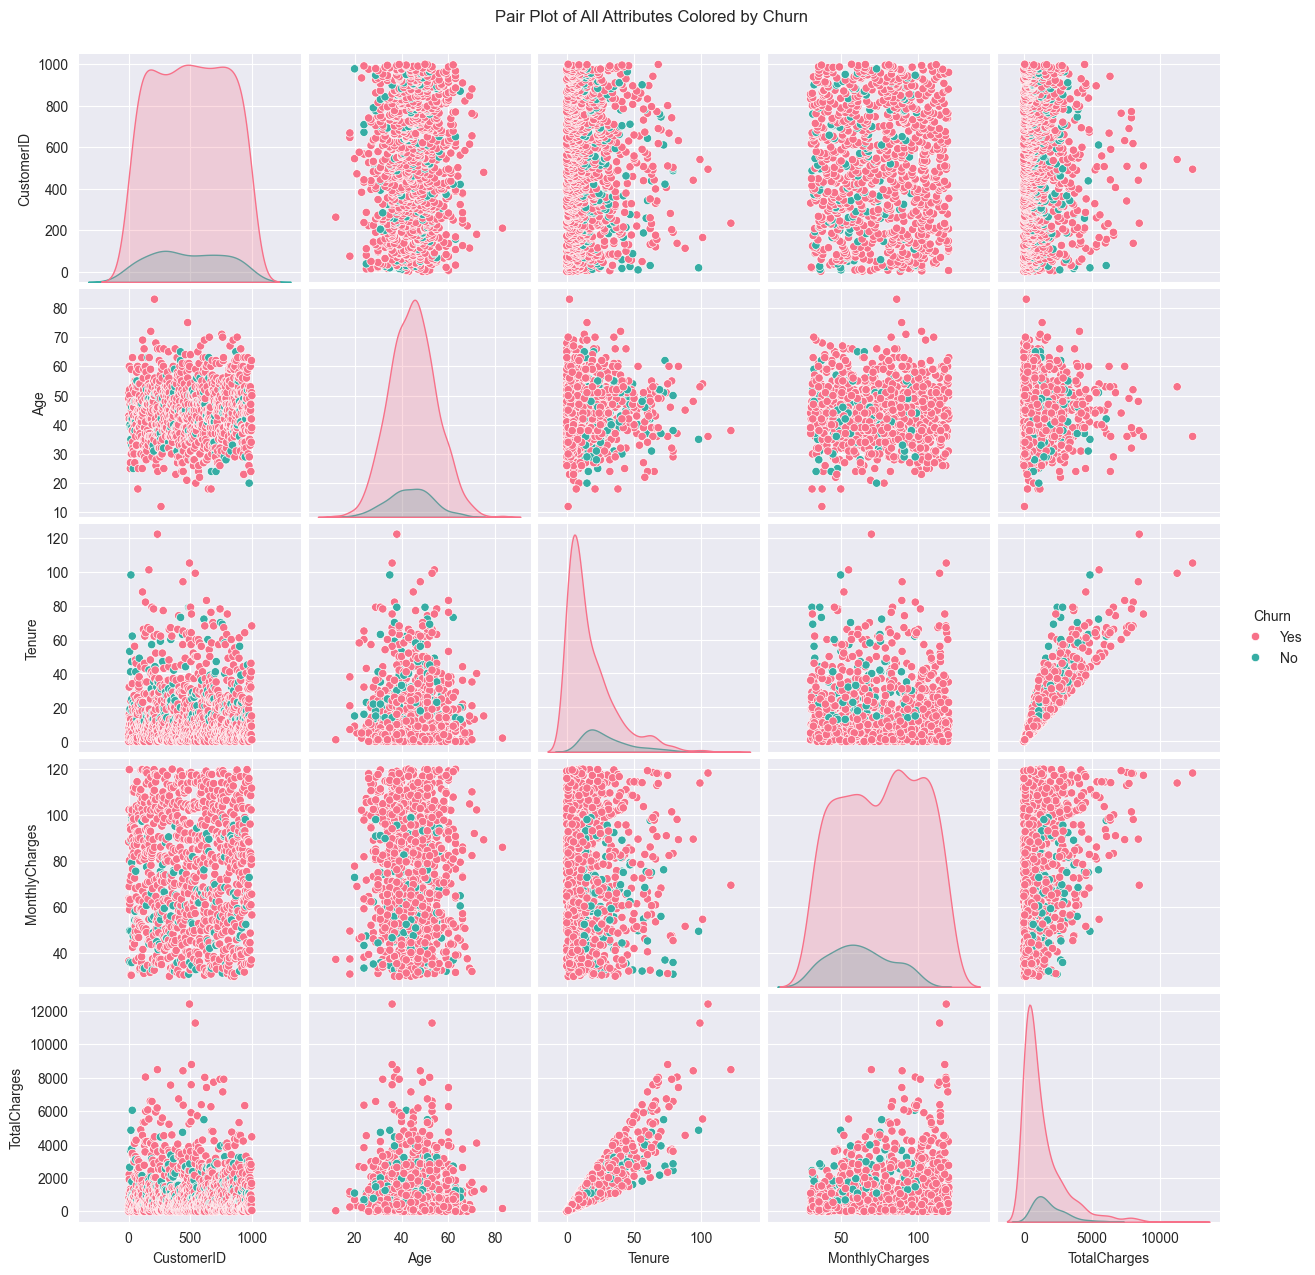

In [33]:
# Pair plot of dataset based on Churn

sns.pairplot(df, hue = 'Churn', diag_kind = 'kde', palette = 'husl')
plt.suptitle('Pair Plot of All Attributes Colored by Churn', y = 1.02)
plt.show()

# **Machine Learning**

In [35]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [36]:
## Define Featues(x) and Target(y) 

x = df[['Age', 'Gender', 'Tenure','MonthlyCharges']]
y = df[['Churn']]

In [37]:
x.head(2)

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67


In [38]:
##  1 = Female and 0 = Male, change data type in bool 

x['Gender'] = x['Gender'].apply(lambda x :1 if x == "Female" else 0)

In [39]:
x.head(2)

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67


In [40]:
y.head(2)

,Churn
0,Yes
1,Yes


In [41]:
## Change Churn   1 = Yes   0 = 'No'

# y['Churn'] = y['Churn'].apply(lambda x : 1 if x = 'Yes' else 0)
# or
y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})
# or
# y['Churn'] = y['Churn'].replace({'Yes': 1, 'No': 0})

In [42]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [43]:
# Train Test Split

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [44]:
# Data Preprocessing with StandarScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.30437574,  0.9206384 , -0.94664634,  0.89516494],
       [-0.38282679,  0.9206384 , -0.84259783, -0.48658632],
       [ 1.05069379,  0.9206384 , -0.68652506, -0.71825249],
       ...,
       [-0.58761545, -1.0862028 , -0.94664634,  0.65093383],
       [-0.99719276, -1.0862028 , -0.84259783,  0.27437814],
       [-0.07564381,  0.9206384 ,  0.09383875, -1.10266126]],
      shape=(800, 4))

In [45]:
x_test = scaler.fit_transform(x_test)

In [46]:
# Import a joblib 
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [47]:
## Import Metrics. 
from sklearn.metrics import accuracy_score, classification_report

## Create a function for check Accuracy Score of Models.
def modelperformance(predictions):
    print('Accuracy score on model is {}', format(accuracy_score(y_test, predictions)))


# Create a function for check Classification Report of Models.
def classification_reports(predictions):
    print('Classification Report  {}', format(classification_report(y_test, predictions)))

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [49]:
log_model = LogisticRegression()

In [50]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [51]:
# log_model.predict([[40, 0, 20, 80]])

y_pred = log_model.predict(x_test)

In [52]:
modelperformance(y_pred)

Accuracy score on model is {} 0.885


In [53]:
classification_reports(y_pred)

Classification Report  {}               precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.88      1.00      0.94       176

    accuracy                           0.89       200
   macro avg       0.94      0.52      0.51       200
weighted avg       0.90      0.89      0.84       200



In [55]:
## KNN
from sklearn.neighbors import KNeighborsClassifier      

In [56]:
param_grid = {
    'n_neighbors':[3,5,7,9],
    'weights': ['uniform', 'distance'],

}

In [57]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5)

In [58]:
gridkn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [59]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [60]:
gridkn.best_score_

np.float64(0.87625)

In [61]:
y_preds = gridkn.predict(x_test)

In [62]:
modelperformance(y_preds)

Accuracy score on model is {} 0.875


In [63]:
classification_reports(y_preds)

Classification Report  {}               precision    recall  f1-score   support

           0       0.33      0.04      0.07        24
           1       0.88      0.99      0.93       176

    accuracy                           0.88       200
   macro avg       0.61      0.52      0.50       200
weighted avg       0.82      0.88      0.83       200



In [65]:
## Import SVC Model.

from sklearn.svm import SVC


In [66]:
svm = SVC()

In [75]:

praams_grid = {
    'C' : [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [68]:
gridsvc = GridSearchCV(svm, praams_grid, cv = 5)

In [69]:
gridsvc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [70]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [71]:
gridsvc.best_score_

np.float64(0.88375)

In [72]:
y_pred = gridsvc.predict(x_test)

In [73]:
modelperformance(y_pred)

Accuracy score on model is {} 0.88


In [74]:
classification_reports(y_pred)

Classification Report  {}               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.88      1.00      0.94       176

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200



In [78]:
## Using Decision Tree Classifier model.

from sklearn.tree import DecisionTreeClassifier

In [79]:
pram_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]    
}

In [80]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), pram_grid, cv = 5)

In [69]:
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [70]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [71]:
grid_tree.best_score_

np.float64(0.87375)

In [72]:
y_pred = grid_tree.predict(x_test)

In [73]:
modelperformance(y_pred)

Accuracy score on model is {} 0.82


In [74]:
classification_reports(y_pred)

Classification Report  {}               precision    recall  f1-score   support

           0       0.23      0.10      0.14        29
           1       0.86      0.94      0.90       171

    accuracy                           0.82       200
   macro avg       0.55      0.52      0.52       200
weighted avg       0.77      0.82      0.79       200



In [81]:
## Useing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()   # Model

In [83]:
# param_gridi
para_grid = {
    'n_estimators': [32, 64, 128, 256],
    'max_features': [2, 3,4],
    'bootstrap' : [True, False]
}

In [78]:
grid_rfc = GridSearchCV(rfc, para_grid, cv = 5)

In [79]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [80]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [81]:
grid_rfc.best_score_

np.float64(0.87625)

In [82]:
y_pred = grid_rfc.predict(x_test)

In [83]:
modelperformance(y_pred)

Accuracy score on model is {} 0.835


In [84]:
classification_reports(y_pred)

Classification Report  {}               precision    recall  f1-score   support

           0       0.33      0.14      0.20        29
           1       0.87      0.95      0.91       171

    accuracy                           0.83       200
   macro avg       0.60      0.55      0.55       200
weighted avg       0.79      0.83      0.80       200



## - SVC Is best Performer -->

In [84]:
gridsvc

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [85]:
best_model = gridsvc.best_estimator_

In [ ]:

import joblib

In [87]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

#### **Notes**

Scaler is exported as scler.pkl

svc Model is exported as model.pkl

order of the x  =>> ['Age', 'Gender', 'Tenure', 'MonthyCharges']